## Stemming using Porter Stemmer and Lancaster Stemmer

In [1]:
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer

In [2]:
porter=PorterStemmer()
lancaster=LancasterStemmer()

In [3]:
words=["running","flies","better","caring","happiness","fishing","studies"]
print(f"{'Word':<12} | {'Porter':<12} | {'Lancaster':<12}")
print("-"*40)
for word in words:
    p_stem=porter.stem(word)
    l_stem=lancaster.stem(word)
    print(f"{word:<12} | {p_stem:<12} | {l_stem:<12}")

Word         | Porter       | Lancaster   
----------------------------------------
running      | run          | run         
flies        | fli          | fli         
better       | better       | bet         
caring       | care         | car         
happiness    | happi        | happy       
fishing      | fish         | fish        
studies      | studi        | study       


## Lemmatization using WordNet and spaCy 

In [4]:
import spacy
from nltk.stem import WordNetLemmatizer

In [5]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
nlp=spacy.load("en_core_web_sm")
words=["leaves", "mice", "ran", "jumping", "children", "faster"]
print(f"{'Words':<12} | {'WordNet':<12} | {'spaCy':<12}")
print('-'*40)

for word in words:
    nltk_lemma=wordnet_lemmatizer.lemmatize(word) #without POS tagging all words treated as noun by default
    doc=nlp(word)
    spacy_lemma=doc[0].lemma_
    print(f"{word:<12} | {nltk_lemma:<12} | {spacy_lemma:<12}")

Words        | WordNet      | spaCy       
----------------------------------------
leaves       | leaf         | leave       
mice         | mouse        | mouse       
ran          | ran          | run         
jumping      | jumping      | jump        
children     | child        | child       
faster       | faster       | fast        


## Stemming and Lemmatization on Large Text dataset

In [18]:
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

In [19]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\shukl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shukl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
raw_words=gutenberg.words('shakespeare-hamlet.txt')
filtered_words=[w.lower() for w in raw_words if w.isalnum()]

In [22]:
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

In [24]:
vocab_original=set(filtered_words)
vocab_stemmed=set([stemmer.stem(w) for w in filtered_words])
vocab_lemmatized=set([lemma.lemmatize(w) for w in filtered_words])

In [28]:
count_original=len(vocab_original)
count_stemmed=len(vocab_stemmed)
count_lemma=len(vocab_lemmatized)

print(f"Original Unique Words: {count_original} \nStemmed Unique Words: {count_stemmed} \nLemma Unique Words: {count_lemma}")

Original Unique Words: 4701 
Stemmed Unique Words: 3745 
Lemma Unique Words: 4428


In [29]:
labels=['Original','Stemmed','Lemmatized']
values=[count_original,count_stemmed,count_lemma]
colors=['red','blue','green']

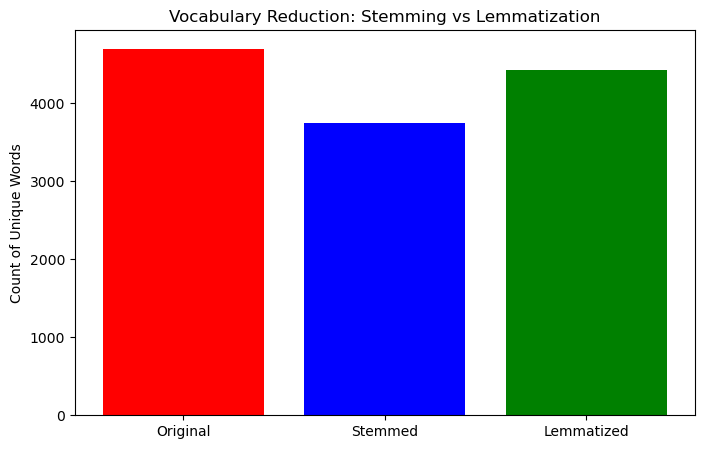

In [31]:
plt.figure(figsize=(8,5))
plt.bar(labels,values,color=colors)
plt.title('Vocabulary Reduction: Stemming vs Lemmatization')
plt.ylabel('Count of Unique Words')
plt.show()